# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

## Build Graph

In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### Get data from source using regular expression

In [3]:
import re

l = "color or colour"
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [4]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "": continue
        city = re.findall("name:'(\w+)'", line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [5]:
city_info = get_city_info(coordination_source)

In [6]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

### Compute distance between cities

In [7]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + 
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 -a))
    d = radius * c
    
    return d

In [8]:
def get_city_distance(city1, city2):
    return geo_distance(city_info[city1], city_info[city2])

get_city_distance("杭州","上海")

153.5185697155768

### Draw the graph

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [10]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_info.keys()))

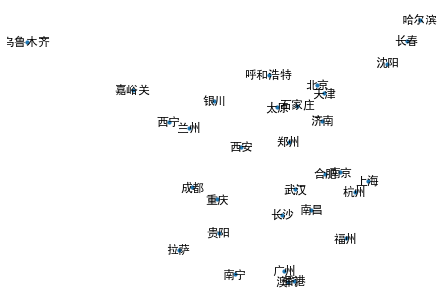

In [11]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

### Build connection between. Let's assume that two cities are connected if their distance is less than 700 km.

In [12]:
threshold = 700

In [13]:
from collections import defaultdict

In [14]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 :continue
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)

In [15]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

### Draw connection graph

In [16]:
cities_connection_graph = nx.Graph(cities_connection)

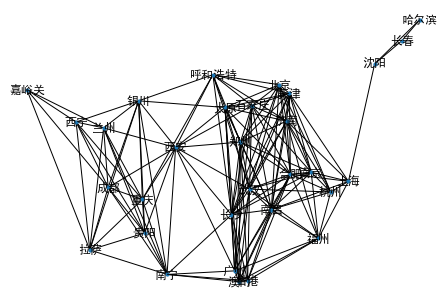

In [17]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

## BFS 1 version

In [18]:
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in visited: continue
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue
                
            new_path = path+[city]
            
            pathes.append(new_path)
            
            if city == destination:
                return new_path
        visited.add(froniter)

In [19]:
search_1(cities_connection, "上海","香港")

['上海', '合肥', '香港']

### Optimal search using variation of BFS

In [20]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited: continue
            
        if froniter == destination:
            return path
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
            
        pathes = search_strategy(pathes)
        visited.add(froniter)

In [21]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue
            
            new_path = path+[city]
            pathes.append(new_path)
            
        pathes = search_strategy(pathes)
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]

In [22]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [23]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [24]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [25]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

In [26]:
search_2(cities_connection, "北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [27]:
search_2(cities_connection, "北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

## Machine Learning

In [28]:
from sklearn.datasets import load_boston
import random

In [29]:
dataset = load_boston()

x,y=dataset['data'],dataset['target']

x.shape

(506, 13)

In [30]:
y.shape

(506,)

In [31]:
x[1].shape
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [32]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

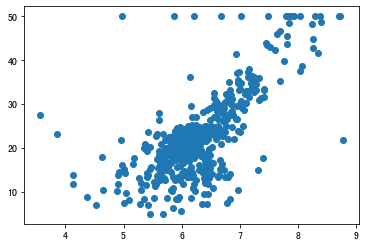

In [34]:
X_rm = x[:,5]

plt.scatter(X_rm, y)

### Gradient descent

### Assume that the target function is a linear function

y = k * rm + b

In [35]:
def price(rm, k, b):
    return k * rm + b

### Define mean square loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [36]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(list(y))

### Define partial derivatives

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i}) $$

In [37]:
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [38]:
k = random.random() * 200 - 100
b = random.random() * 200 - 100

learning_rate = 1e-3

iteration_num = 200
losses = []

for i in range(iteration_num):
    price_use_current_parameters = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
    
best_k = k
best_b = b

Iteration 0, the loss is 250488.5472442069, parameters k is -90.12298889490644 and b is 93.34836993183728
Iteration 1, the loss is 211158.4749785954, parameters k is -83.79620470275316 and b is 94.33951887482154
Iteration 2, the loss is 178010.79905624138, parameters k is -77.98788618151332 and b is 95.2491624689291
Iteration 3, the loss is 150073.6922302548, parameters k is -72.65554268453535 and b is 96.0839804592259
Iteration 4, the loss is 126528.0913512643, parameters k is -67.76016586920142 and b is 96.85010515492954
Iteration 5, the loss is 106683.68397453832, parameters k is -63.265944306086524 and b is 97.55316629429639
Iteration 6, the loss is 89958.66969589899, parameters k is -59.14000147721016 and b is 98.19833223262465
Iteration 7, the loss is 75862.70285681852, parameters k is -55.35215524653711 and b is 98.79034775471105
Iteration 8, the loss is 63982.51653085601, parameters k is -51.874697042977516 and b is 99.33356878840269
Iteration 9, the loss is 53969.806313720765,

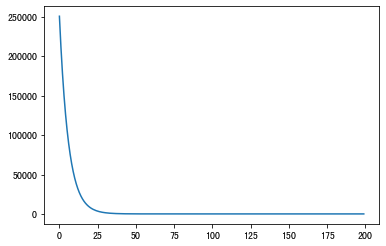

In [39]:
plt.plot(list(range(iteration_num)),losses)

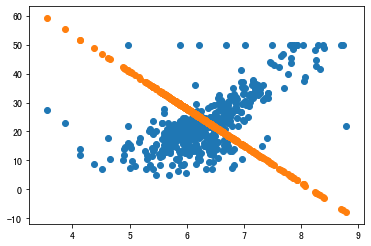

In [40]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
- 所有节点间的cost必须>=0
- 每次迭代都要对存储搜索历史的list做排序

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

IDDFS 迭代神话深度优先搜索算法，

BFS 的优点在于，层层推进，不易陷入死胡同；

DFS 的优点在于，空间占用小，搜索直接；

将两者的优点结合起来，就得到了 IDDFS——对DFS搜索的深度加以限制。

我们可以先估计一个深度，比如2，让DFS搜索前两步所能达到的节点；如果搜不到，也不继续搜索，直接返回。然后搜索其他的节点。如果找不到，就放宽限制，将深度设为4、8、、、、

参考：https://www.cycode.club/difang/271/


##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
BFS适用于找到最短路径

DFS适用于找到全部的解

##### 2.4 When can we use machine learning ?
机器学习的定义：根据一些数据来构造一个模型，这个模型能随着更多数据的输入，做出越来越准确的判断、预测等。
当你面对一个非常复杂的问题，且拥有大量的数据，适合使用机器学习

##### 2.5 What is the gradient of a function ?
函数在某一点的梯度是这样一个向量，它的方向与取得最大方向倒数的方向一致，而它的模为方向倒数的最大值。函数沿梯度方向有最大的变化率

参考：https://blog.csdn.net/walilk/article/details/50978864


##### 2.6 How can we find the maximum value of a function using the information of gradient ?
梯度方向是函数上升最快的方向，所以沿着梯度方向一步步走，就会找到函数的最大值。


#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and BeautifulSoup package to parse the webpages

In [41]:
import requests
from bs4 import BeautifulSoup
import re
import os

url = 'https://www.bjsubway.com/station/zjgls/#'
response = requests.get(url)
response.encoding = 'gbk'
html = response.text
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>站间公里数 | 北京地铁官方网站</title>
<meta content="北京地铁官方网站,首末车时间" name="keywords"/>
<meta content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" name="description"/>
<link href="http://www.bjsubway.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="http://www.bjsubway.com/subway/css/common.css" rel="stylesheet" type="text/css"/>
<link href="http://www.bjsubway.com/subway/css/search.css" rel="stylesheet" type="text/css"/>
<script src="http://www.bjsubway.com/subway/js/jquery.js" type="text/javascript"></script>
<script src="http://www.bjsubway.com/subway/js/around.js" type="text/javascript"></script>
<script type="text/javascript">
/*线路名称多窗口切换效果*/
function GetId(id){
  return document.getElementById(id)        
 }
  function doClick(o){
  var j,id,

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [42]:
def get_txt_name():  # 得到线路名称的前一步
    txt_src_name = []
    for i in range(5, 10):
        temp = soup.find_all('td', {'colspan': str(i)})
        txt_src_name += temp
    return txt_src_name

#print(get_txt_name())

def get_txtuseful_name():  # 得到可用的线路名称
    obj = []
    for each in get_txt_name():
        temp = re.findall(r">(.+?)<", str(each))
        obj += temp
    return obj

#print(get_txtuseful_name())

Stationinfo = soup.find_all('tbody')  # 汤汁是ResultSet，即结果集
def get_stationinfo():
    obj = []
    for each in Stationinfo:
        temp = re.findall(r">(.+?)<", str(each))
        obj += temp
    return obj

station_list = get_stationinfo()

In [43]:
station_list

['苹果园——古城',
 '2606',
 '上行/下行',
 '古城——八角游乐园',
 '1921',
 '上行/下行',
 '八角游乐园——八宝山',
 '1953',
 '上行/下行',
 '八宝山——玉泉路',
 '1479',
 '上行/下行',
 '玉泉路——五棵松',
 '1810',
 '上行/下行',
 '五棵松——万寿路',
 '1778',
 '上行/下行',
 '万寿路——公主坟',
 '1313',
 '上行/下行',
 '公主坟——军事博物馆',
 '1172',
 '上行/下行',
 '军事博物馆——木樨地',
 '1166',
 '上行/下行',
 '木樨地——南礼士路',
 '1291',
 '上行/下行',
 '南礼士路——复兴门',
 '424',
 '上行/下行',
 '复兴门——西单',
 '1590',
 '上行/下行',
 '西单——天安门西',
 '1217',
 '上行/下行',
 '天安门西——天安门东',
 '925',
 '上行/下行',
 '天安门东——王府井',
 '852',
 '上行/下行',
 '王府井——东单',
 '774',
 '上行/下行',
 '东单——建国门',
 '1230',
 '上行/下行',
 '建国门——永安里',
 '1377',
 '上行/下行',
 '永安里——国贸',
 '790',
 '上行/下行',
 '国贸——大望路',
 '1385',
 '上行/下行',
 '大望路——四惠',
 '1673',
 '上行/下行',
 '四惠——四惠东',
 '1714',
 '上行/下行',
 '西直门——车公庄',
 '909',
 '上行/下行',
 '车公庄——阜成门',
 '960',
 '上行/下行',
 '阜成门——复兴门',
 '1832',
 '上行/下行',
 '复兴门——长椿街',
 '1234',
 '上行/下行',
 '长椿街——宣武门',
 '929',
 '上行/下行',
 '宣武门——和平门',
 '851',
 '上行/下行',
 '和平门——前门',
 '1171',
 '上行/下行',
 '前门——崇文门',
 '1634',
 '上行/下行',
 '崇文门——北京站',
 '1023',
 '上行/下行',
 '北京站——建国门',
 '

In [68]:
def get_all_station_name():
    stations = []
    for info in station_list:
        tmp = re.findall(r"(\w+)——(\w+)", info)
        if tmp:
            tmp = list(tmp[0])
            if tmp[0] not in stations:
                stations.append(tmp[0])
            if tmp[1] not in stations:
                stations.append(tmp[1])
    return stations

stations = get_all_station_name()

In [69]:
stations

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东',
 '西直门',
 '车公庄',
 '阜成门',
 '长椿街',
 '宣武门',
 '和平门',
 '前门',
 '崇文门',
 '北京站',
 '朝阳门',
 '东四十条',
 '东直门',
 '雍和宫',
 '安定门',
 '鼓楼大街',
 '积水潭',
 '安河桥北',
 '北宫门',
 '西苑',
 '圆明园',
 '北京大学东门',
 '中关村',
 '海淀黄庄',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '新街口',
 '平安里',
 '西四',
 '灵境胡同',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西',
 '公益西桥',
 '天通苑北',
 '天通苑',
 '天通苑南',
 '立水桥',
 '立水桥南',
 '北苑路北',
 '大屯路东',
 '惠新西街北口',
 '惠新西街南口',
 '和平西桥',
 '和平里北街',
 '北新桥',
 '张自忠路',
 '东四',
 '灯市口',
 '磁器口',
 '天坛东门',
 '蒲黄榆',
 '刘家窑',
 '宋家庄',
 '海淀五路居',
 '慈寿寺',
 '花园桥',
 '白石桥南',
 '车公庄西',
 '北海北',
 '南锣鼓巷',
 '东大桥',
 '呼家楼',
 '金台路',
 '十里堡',
 '青年路',
 '褡裢坡',
 '黄渠',
 '常营',
 '草房',
 '物资学院路',
 '通州北关',
 '通运门',
 '北运河西',
 '北运河东',
 '郝家府',
 '东夏园',
 '潞城',
 '北京西站',
 '湾子',
 '达官营',
 '广安门内',
 '虎坊桥',
 '珠市口',
 '桥湾',
 '广渠门内',
 '广渠门外',
 '双井',
 '九龙山',
 '大郊亭',
 '百子湾',
 '化工',
 '南楼梓庄',
 '欢乐谷景区',
 '垡头

In [70]:
from collections import defaultdict

def get_connections(stations, station_list):
    station_connection = defaultdict(list)
    for station in stations:
        for info in station_list:
            tmp = re.findall(r"(\w+)——(\w+)", info)
            tmp = list(tmp)
            if tmp:
                tmp = list(tmp[0])
                
                if station in tmp:
                    tmp.remove(station)
                    station_connection[station].append(tmp[0])
    return station_connection         

station_connection = get_connections(stations, station_list)
station_connection

defaultdict(list,
            {'苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '灯市口', '崇文门'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '红庙'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['车公庄', 

In [71]:
import pandas
from urllib import request
import pandas as pd
import numpy as np
import urllib.parse as urp
from xml.etree import ElementTree
import time

def get_location1(name,city):  
    my_ak = 'SQ3G47fUxZYIV48U9wME1MHN61BeQjkq'
    tag = urp.quote('地铁站')
    qurey = urp.quote(name)
    try:
        url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
        req = request.urlopen(url)
        res = req.read().decode()
        lat = pd.to_numeric(re.findall('"lat":(.*)',res)[0].split(',')[0])
        lng = pd.to_numeric(re.findall('"lng":(.*)',res)[0])
        return (lng,lat)
    except:
        return 0,0

In [72]:
def get_location_list(stations):
    station_location = {}
    for station in stations:
        time.sleep(2)
        x_y = get_location1(station, '北京')
        station_location[station] = x_y
    return station_location

location_list = get_location_list(stations)
location_list

{'苹果园': (116.184436, 39.932435999999996),
 '古城': (116.197076, 39.913414),
 '八角游乐园': (116.21939499999999, 39.913076000000004),
 '八宝山': (116.24835800000001, 39.918286),
 '玉泉路': (116.259475, 39.913501000000004),
 '五棵松': (116.28066100000001, 39.913834),
 '万寿路': (116.30131899999999, 39.920274),
 '公主坟': (116.316746, 39.913701),
 '军事博物馆': (116.330207, 39.914976),
 '木樨地': (116.3441, 39.913125),
 '南礼士路': (116.359177, 39.912979),
 '复兴门': (116.36376000000001, 39.913025),
 '西单': (116.381905, 39.913327),
 '天安门西': (116.398036, 39.913776),
 '天安门东': (116.407913, 39.914082),
 '王府井': (116.418038, 39.91979),
 '东单': (116.425374, 39.914503),
 '建国门': (116.44195, 39.914505),
 '永安里': (116.457086, 39.914223),
 '国贸': (116.46732800000001, 39.914437),
 '大望路': (116.48355500000001, 39.914614),
 '四惠': (116.50203300000001, 39.914861),
 '四惠东': (116.521965, 39.914941),
 '西直门': (116.361446, 39.946471),
 '车公庄': (116.36188700000001, 39.938351000000004),
 '阜成门': (116.36281699999999, 39.929522),
 '长椿街': (116.36991100000002,

In [73]:
location_list['奥林匹克公园'] = (116.393, 40.0023)
location_list['高碑店'] = ()
location_list['奥林匹克公园']

(116.393, 40.0023)

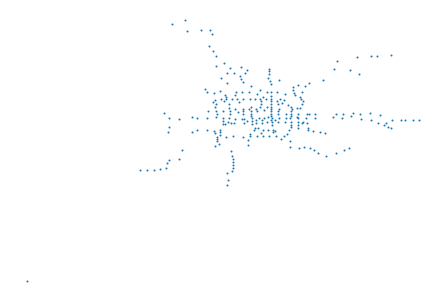

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

station_graph = nx.Graph()

station_graph.add_nodes_from(list(location_list.keys()))
                        
nx.draw(station_graph, location_list, node_size=1)

In [75]:
station_connection_graph = nx.Graph(station_connection)

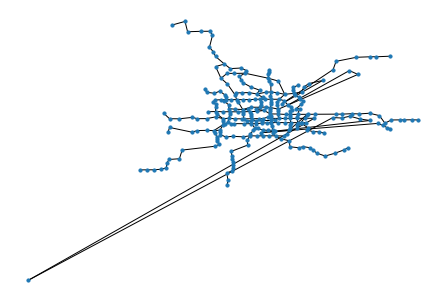

In [78]:
nx.draw(station_connection_graph, location_list, node_size=10)

#### 3. Build the search agent

Build the search agent based on the graph you built.

for example, if you use Beijing subway graph, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [84]:
def search(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for station in successsors:      #遍历子节点
            if station in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[station]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if station == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [86]:
search(station_connection, "奥体中心", "天安门西")

['奥体中心',
 '北土城',
 '安华桥',
 '安德里北街',
 '鼓楼大街',
 '积水潭',
 '西直门',
 '车公庄',
 '阜成门',
 '复兴门',
 '西单',
 '天安门西']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 